<a href="https://colab.research.google.com/github/RahulJuluru2/unit2assignments/blob/main/U2W11_18_Medical_MNIST_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to :

* Apply PCA on the features
* Train and classify the PCA transformed data using MLP classifier

In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/MedMNIST.mp4" type="video/mp4">
</video>
""")

## Dataset

### History

It's developed in 2017 by Arturo Polanco Lozano. This is also known as the MedNIST dataset for radiology and medical imaging. Images have been gathered from several datasets – at TCIA, the RSNA Bone Age Challenge, and the NIH Chest X-ray dataset.

### Description

The dataset contains 58954 medical images belonging to 6 classes – 

* ChestCT(10000 images) - computed tomography of the chest
* BreastMRI(8954 images) - MRI of the breast
* CXR(10000 images) - chest X-RAY
* Hand(10000 images) - hand (X-RAY)
* HeadCT(10000 images) - computed tomography of the head
* AbdomenCT(10000 images) - computed tomography of the abdominal cavity

Images are in the dimensions of 64×64 pixels. The training set has 41259 images and testing set has 17695 images.

## Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U2W11_18_Medical_MNIST_C" #name of the notebook

def setup():
    from IPython.display import HTML, display
    ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/med_mnist.zip")
    ipython.magic("sx unzip -qq med_mnist.zip")
    #ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fashion-mnist_test.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Importing Required Packages

In [ ]:
import pandas as pd
# Skimage provides easy-to-use functions for reading, displaying, and saving images
# First, import the io module of skimage (skimage.io) so we can read and write images
from skimage.io import imread
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Load the train data

In [ ]:
%cd med_mnist

/content/med_mnist


In [ ]:
df = pd.read_csv('med_mnist_train.csv')

In [ ]:
df.head()

,category,image
0,AbdomenCT,img/AbdomenCT/000000.jpeg
1,AbdomenCT,img/AbdomenCT/000001.jpeg
2,AbdomenCT,img/AbdomenCT/000002.jpeg
3,AbdomenCT,img/AbdomenCT/000003.jpeg
4,AbdomenCT,img/AbdomenCT/000004.jpeg


## Read and Pre-process the image data

In [ ]:
# Below is the function to read and pre-process the images
def read_data(file):
    
    labels = []
    features = []
    # Storing the 'category' and 'image' data to a list
    category_list = list(file['category'])  # category_list contains the class names of the data
    image_list = list(file['image'])        # image_list contains the list of images for each category

    for cat, img in zip(category_list, image_list):
        labels.append(cat)  # Append the label of each category to labels list

        # Using skimage.io.imread() function to read the images 
        image = imread(img)

        # We can load the images and reshape the data arrays to have a single color channel
        feature = image.reshape(64*64)
        features.append(feature)  
    
    return features, labels

In [ ]:
# Call the 'read_data' function by passing the dataframe
features, labels = read_data(df)

In [ ]:
# Print the length of features and labels
len(features), len(labels)

(41259, 41259)

## Visualizing the Images 

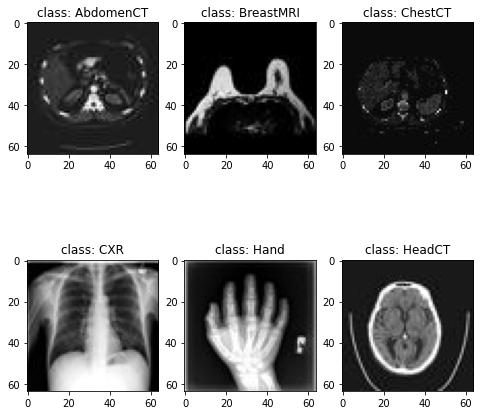

In [ ]:
plt.figure(figsize=(8,8))
i = 0
rows, cols = 2, 3
label = []
for X,y in zip(features, labels):
    plt.subplot(rows, cols, i+1)
    # Get the unique labels
    if y not in label:
        plt.imshow(X.reshape(64,64), cmap="gray")
        plt.title('class: {}'.format(str(y)))
        label.append(y)
        i += 1
        if i == rows*cols:
            break

## Split the data into train and test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25, random_state=1) 

In [ ]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(30944, 10315, 30944, 10315)

## Apply PCA on the train data with different components

In [ ]:
# Create an object for PCA 
# Fit and transform the train data using PCA
pca = PCA(n_components=2).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Train the model using MLP Classifier



#### RELU Activation Function

A Rectified Linear Unit has output 0 if the input is less than 0. That is, if the input is greater than or equal to 0, the output is equal to the input. The operation of ReLU is closer to the way our biological neurons work.

![alt text](https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/RELU.png)





In [ ]:
# Create a object for MLPClassifier 
clf = MLPClassifier(activation='relu')

In [ ]:
# Fit the data to the model       
clf.fit(X_train_pca, Y_train)

# Get the predictions on the test data
pred = clf.predict(X_test_pca)

In [ ]:
# Calculate the accuracy
accuracy_score(Y_test, pred)

0.915075133301018

## Test the model 



In [ ]:
df_test = pd.read_csv('med_mnist_test.csv')

In [ ]:
df_test.head()

,category,image
0,AbdomenCT,img/AbdomenCT/000005.jpeg
1,AbdomenCT,img/AbdomenCT/000006.jpeg
2,AbdomenCT,img/AbdomenCT/000014.jpeg
3,AbdomenCT,img/AbdomenCT/000025.jpeg
4,AbdomenCT,img/AbdomenCT/000026.jpeg


In [ ]:
test_features, test_labels = read_data(df_test)

In [ ]:
len(test_features), len(test_labels)

(17695, 17695)

#### Apply PCA on Test data

In [ ]:
# Create an object for PCA 
x_test_pca = pca.transform(test_features)

#### Test the Model with PCA features

In [ ]:
# Get the predictions on the test data
test_pred = clf.predict(x_test_pca)

In [ ]:
# Calculate the accuracy
accuracy_score(test_pred, test_labels) 

0.9163605538287651

# Please answer the questions below to complete the experiment:




In [ ]:
#@title State True or False: The RELU activation function returns an output equal to the input value when the input is positive.
Answer = "TRUE" #@param ["","TRUE","FALSE"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1853
Date of submission:  23 Jul 2022
Time of submission:  16:28:46
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
